# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import sklearn
#from sklearn import linear_model
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

data = pd.read_csv("student-mat.csv", sep=";")
print(data.head())

In [ ]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

In [ ]:
predict = "G3"

X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)


"""best = 0
for _ in range(30):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)

    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
        best = acc
        # saves model
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)"""

In [ ]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [ ]:
print("Coefficient:", linear.coef_)
print("Intercept:", linear.intercept_)


In [ ]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

In [ ]:
p = "absences"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

# Classification - K Nearest Neighbors (KNN)

In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

data = pd.read_csv("car.data")
print(data.head())

In [ ]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
clss = le.fit_transform(list(data["class"]))
print(buying)

In [ ]:
predict = "class"

X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(clss)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

In [ ]:
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
    print("Predicted: ", names[predicted[x]], "Data: ", tuple(int(val) for val in x_test[x]), "Actual: ", names[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)
    print("N: ", n)

# Support Vector Machines (SVM)

In [ ]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

cancer = datasets.load_breast_cancer()

print(cancer.feature_names)
print(cancer.target_names)

In [ ]:
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

print(x_train, y_train)
classes = ["malignant", "benign"]

In [ ]:
clf = svm.SVC(kernel="linear", C=2)
clf.fit(x_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors=9)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred_2 = clf2.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
acc2 = metrics.accuracy_score(y_test, y_pred_2)

print("SVM: ", acc)
print("KNN: ", acc2)

# K-means clustering

In [47]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data)

y = digits.target

# k = len(np.unique(y))
k = 10

samples, features = data.shape

In [45]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [48]:
clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "1", data)

1        	69477	0.605	0.653	0.628	0.476	0.624	0.143


n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.06s	69813	0.650	0.694	0.671	0.534	0.668	0.123
random   	0.04s	69607	0.599	0.647	0.622	0.473	0.618	0.142
__________________________________________________________________________________


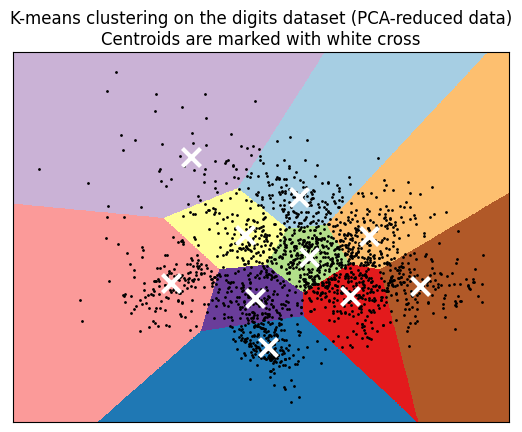

In [49]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)


print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()